# Uber Data Analysis | Prediction using Machine_Learning

## Introduction

With over 118 million users, 5 million drivers, and 6.3 billion trips with 17.4 million trips completed per day - Uber is the company behind the data for moving people and making deliveries hassle-free. How are drivers assigned to riders cost-efficiently, and how is dynamic pricing leveraged to balance supply and demand? Thanks to the large volumes of data Uber collects and the fantastic team that handles Uber Data Analysis using Machine Learning tools and frameworks. If you’re curious to learn more about how data analysis is done at Uber to ensure positive experiences for riders while making the ride profitable for the company - Get your hands dirty working with the Uber dataset to gain in-depth insights.

## Getting Started with Uber Data Analysis Project
The typical machine learning project life cycle involves defining the problem, building a solution, and measuring the solution's impact on the business. However, before getting started with any machine learning project, it is essential to realize how prevalent the exercise of exploratory data analysis (EDA) is in any machine learning project. 80% of a data scientist’s job is to explore and understand raw data, generate insights by cleaning, wrangling, and analyzing it, and determine whether you can employ machine learning for a given business use case. If the EDA is absent or insufficient, the team’s knowledge of the data is incomplete. Without sufficient understanding of the data, calibration of analytical algorithms, ML models, or creating a compelling product or solution becomes extremely unreliable (if not inapplicable in the real world). It is clear how significant the manual study and analysis of data is for a data scientist and machine learning engineers, AI researchers, and data science students. The motivation, of course, extends to analysis of data from Uber rides as well – especially for Uber executives and consumers.

Now that our motivation for the Uber Data Analysis project using machine learning in Python is clear let's look at the publicly available Uber datasets for data analysis and prediction.

## The Uber Datasets
We will perform data analysis on two types of rider data from Uber. The first dataset contains information about the rides taken by one particular user, and the second contains similar details about the rides taken by Uber users in two cities.

### 1. Uber Personal Data

[This Kaggle Uber dataset](https://www.kaggle.com/datasets/zusmani/uberdrives) contains information about 1155 rides of a single Uber user in 2016. The features include the trip date, source, destination, distance traveled, and purpose of the trip.

This dataset is a good starting point for performing basic EDA. Based on this, we might also be able to generate some insights by relating the data to real-world events and user habits.


### 2. Uber and Lyft Dataset Boston, MA
This expansive [Uber and Lyft Dataset on Kaggle](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) contains two months' worth of ride information and several other details about the trip environment for all the Uber, and Lyft rides taken in Boston, MA. We use data from only the Uber rides.

It contains 57 such feature columns that span from basic ride information to extensive details of the weather on that day. Other columns include: 

[hour, day, month, price, distance, temperature, 

apparentTemperature, precipIntensity, precipProbability, 

humidity, windSpeed, windGust, windGustTime, visibility, 

temperatureHigh, temperatureHighTime, temperatureLow, 

temperatureLowTime, apparentTemperatureHigh, 

apparentTemperatureHighTime, apparentTemperatureLow, 

apparentTemperatureLowTime, dewPoint, pressure, windBearing, 

cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, 

moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime]


We also use this dataset to train a regression model that predicts the price of an Uber ride given some of the feature values. This regression model will use only some of the 57 feature columns mentioned above. We will first choose 25 of them manually and then use recursive feature elimination to extract the n-most significant features.


## Insight Generation 
To perform a preliminary EDA, we will follow specific steps to extract and understand the data visually:

- Identify a feature to explore and find the unique values in that column

- Handle NaN or NULL values.

- Plot a bar graph or histogram of the column data based on the data type.

- Identify outliers and peculiar trends and provide explanations for these trends by relating them to the real world.

After this process, we will better understand the story our limited data is trying to tell. This will make the decision-making process for solving a business problem well-informed and smooth.

## Exploratory Data Analysis on Uber Data
We will use the data of a single Uber user for the year 2016 uploaded on Kaggle here: [My Uber Drives](https://www.kaggle.com/datasets/zusmani/uberdrives).

First, we import the necessary Python libraries.

In [1]:
import pandas as pd

import numpy as np

import time,datetime

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

import calendar

Loading the CSV using Pandas and taking a quick look inside the dataset below.

In [2]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


We see the 7 features as mentioned earlier. This basic dataset is sufficient to perform a quick EDA in Python using Pandas and graphing libraries like Matplotlib and Seaborn.

Before proceeding, the first step is to handle unwanted values.



In [ ]:
#Now lets rename the columns and remove '*' from columns' name.
# uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
#                                         uber_data.columns[1]:'END_DATE',
#                                         uber_data.columns[2]:'CATEGORY',
#                                         uber_data.columns[3]:'START',
#                                         uber_data.columns[4]:'STOP',
#                                         uber_data.columns[5]: 'MILES',
#                                         uber_data.columns[6]:'PURPOSE'})

In [4]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [5]:
uber_data[uber_data.START.str.contains('\?') == True]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
140,2/20/2016 14:50,2/20/2016 15:54,Business,R?walpindi,R?walpindi,23.1,Meeting
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies


In [6]:
uber_data['START'] = uber_data['START'].replace({"\?":"a"}, regex = True)
uber_data["STOP"] = uber_data["STOP"].replace({"\?":"a"}, regex = True)

Next, we notice that the date columns contain some composite information such as day, day of the week, month, and time. Separating them gives us more granular information to explore.

In [7]:
#make string as datetime to identify individual easily

uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR'] =  [x.hour for x in uber_data['START_DATE']]
uber_data['DAY'] =  [x.day for x in uber_data['START_DATE']]
uber_data['MONTH'] =  [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY'] =  [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK'] =  [x.dayofweek for x in uber_data['START_DATE']]


So this is what our data looks like now:

In [8]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


# Analysis

Now, let’s see what the “category” column looks like using the countplot() method of seaborn. This method will count the frequency of every unique value in the column and plot a bar graph.

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

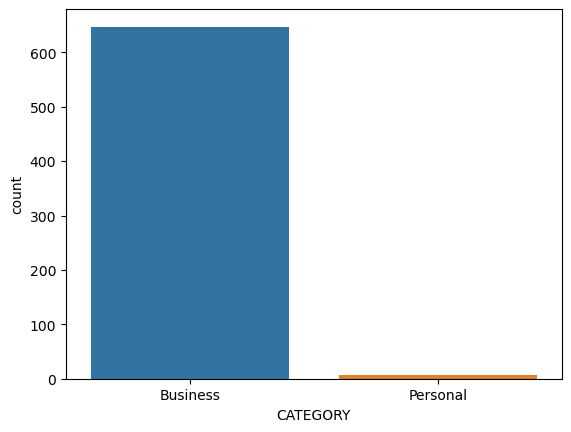

In [9]:
sns . countplot(x= 'CATEGORY' ,data=uber_data)

Similarly, for “purpose” we get:

<AxesSubplot:xlabel='count', ylabel='PURPOSE'>

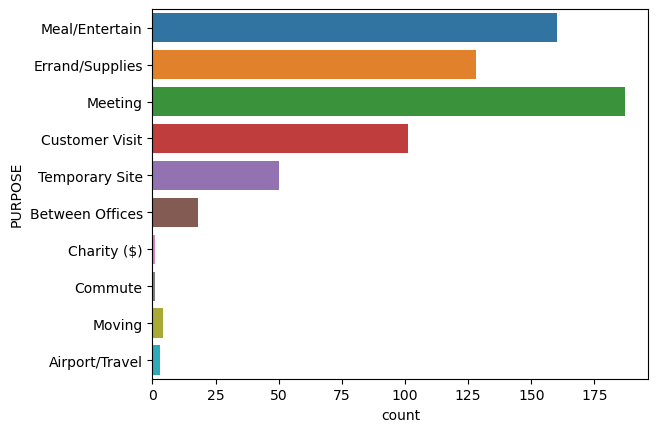

In [10]:
sns . countplot(y= 'PURPOSE' ,data=uber_data)

Using these two graphs, it is clear that users most used Uber for work-related meetings and meals most of the time. Other significant purposes include errands and customer visits. We can presume that the user works in a client-oriented service industry that involves frequent traveling and dining with clients in the city.

Ace Your Next Job Interview with Mock Interviews from Experts to Improve Yo

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short, which validates our assumption about the user’s work-related travels.

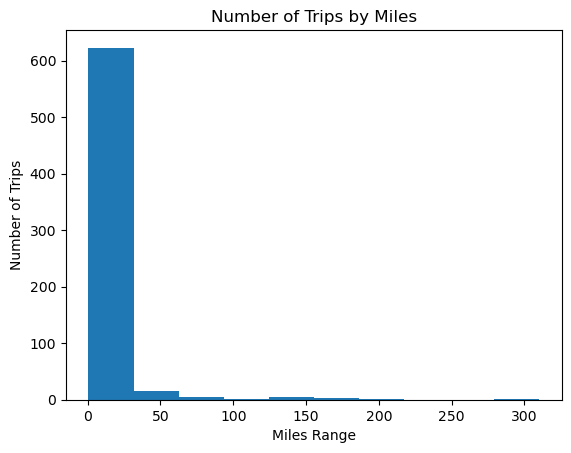

In [11]:
uber_data[ 'MILES' ].plot.hist()

plt.xlabel("Miles Range")
plt.ylabel("Number of Trips")

# setting y_label as price
plt.title("Number of Trips by Miles")
plt.show()

Next, let us see at what time of the day the user rides an Uber the most.

Text(0.5, 1.0, 'Number of trips Vs hours')

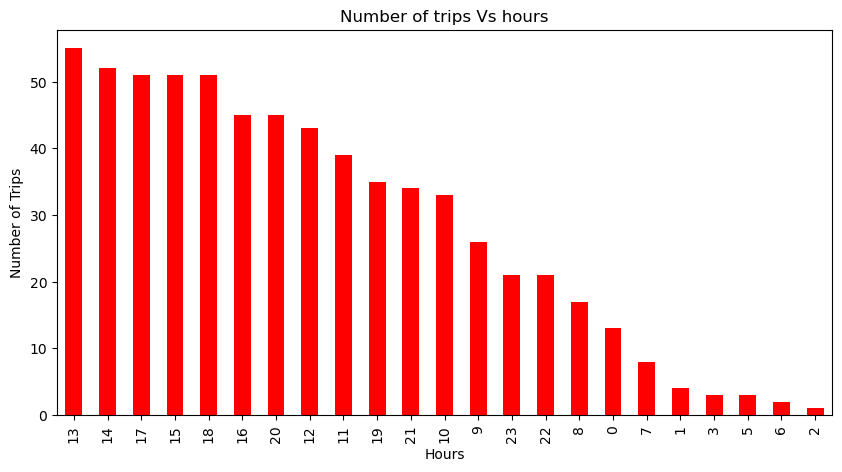

In [12]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind= 'bar', color= 'red', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day. It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

At a level above a single day, we can look at the user's travel patterns on different days of the week.

Text(0.5, 1.0, 'Number of trips Vs days')

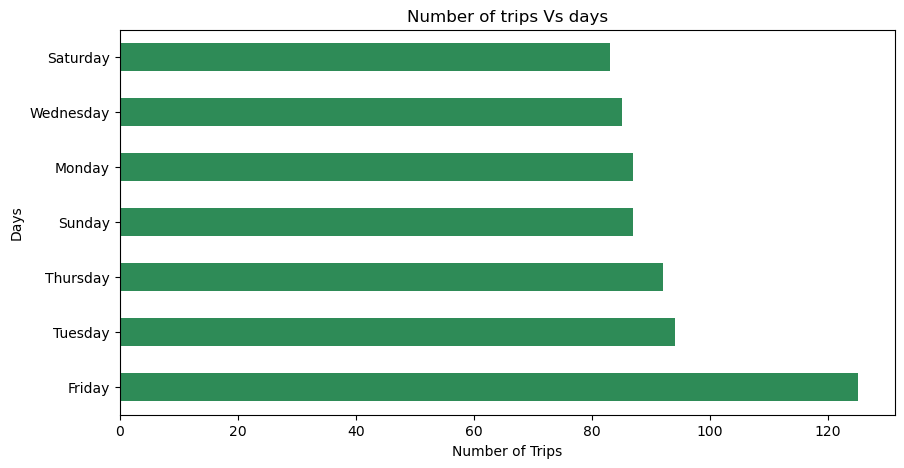

In [13]:
days = uber_data[ 'WEEKDAY' ].value_counts()
days.plot(kind='barh', color= 'seagreen', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the evenings too, we can assume that the additional number of trips on Fridays might be recreational.

Further, we can also look at the month-wise distribution of Uber trips.

Text(0.5, 1.0, 'Number of trips Vs Months')

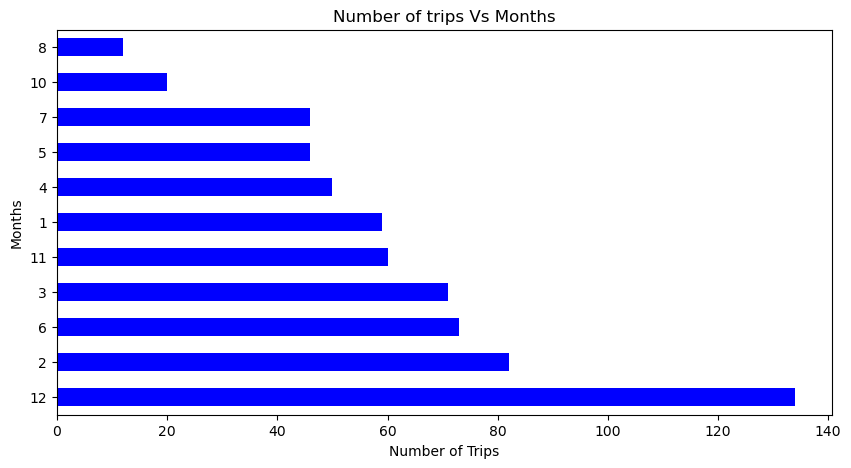

In [14]:
months = uber_data[ 'MONTH' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Following the steps of insight generation mentioned at the beginning of this article, we must point out how there were significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

Let’s see on which days of December the user traveled in an Uber:

Text(0.5, 1.0, 'Number of trips Vs days of december')

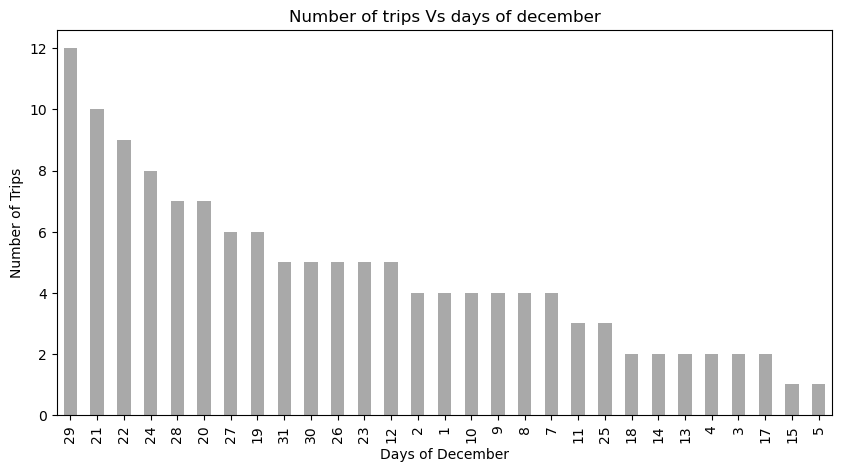

In [15]:
months = uber_data[ 'DAY' ][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

As expected, the user traveled a lot during the Christmas break. And it is safe to assume that these trips were part of the trips taken during the holiday season.

Now, taking a different direction, let’s see where the user traveled to and from in an Uber.

Text(0.5, 1.0, 'Number of Trips by Pickup points')

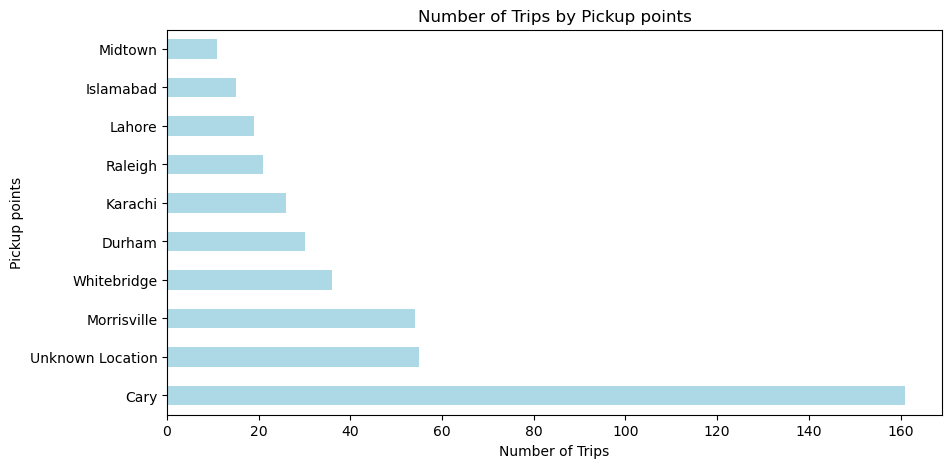

In [16]:
pic_point = uber_data[ 'START' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

The skewed number of trips start from Cary could mean that the user either resides or works in this region.

Similarly, let’s also look at the destination of these trips.

Text(0.5, 1.0, 'Number of Trips by Drop points')

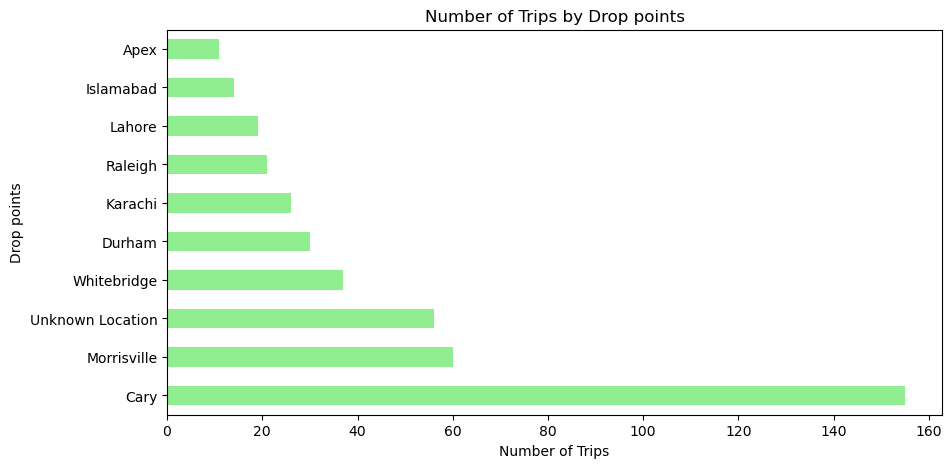

In [17]:
drop_point = uber_data[ 'STOP' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the user usually commutes around Cary or Morrisville.

However, we can still check how often the user takes particular “trips” from location A to B.

Text(0.5, 1.0, 'points - points Trips Counts')

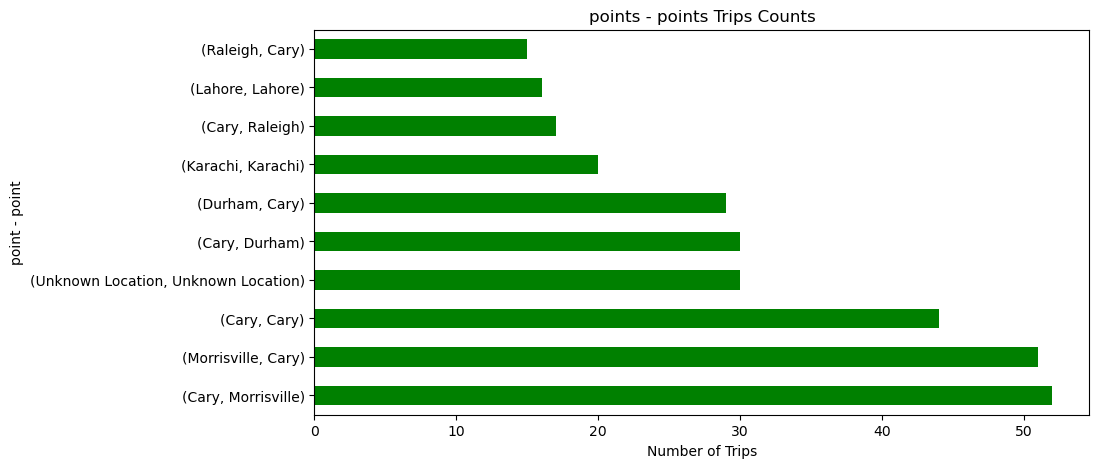

In [18]:
p_p = uber_data[[ 'START', 'STOP'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

As we deduced, the user travels very frequently between Cary and Morrisville.

In [19]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.97
Personal: 35.583
Meal/Entertain: 5.698


So, we have seen how much knowledge this elementary dataset can give us about the user’s riding patterns and the user himself. These kinds of insights, when performed on a more complex level, can be an asset to recommendation systems or services that need to track a user’s behavior and act accordingly – streaming services, health monitoring apps, e-commerce websites, etc.

In [20]:
# Exporting tha data in csv format for visualization job...

# uber_data.to_csv('uber_data01.csv', index=False)

## Exploratory Data Analysis of Boston Uber Data
Similar to the Personal Uber Data, we also have the relevant data columns in this dataset. First, download the data from Kaggle: [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma).

Now we load the data using Pandas,

In [21]:
data2 = pd.read_csv('rideshare_kaggle.csv' )

Looking at some of the many columns:

In [22]:
data2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Since there are more than 55 columns in this dataset, there are many that might be useless for our simple use case. So we can just drop the extra columns and work with the rest.

In [23]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']

data2 = data2.drop(extra_cols, axis=1)

In [24]:
data2.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [25]:
data2.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
49783,f010ca22-dc70-48b0-9582-30debe6d29bc,1.544673e+09,3,13,12,2018-12-13 03:41:49,America/New_York,North End,North Station,Uber,...,Partly cloudy throughout the day.,0.0,3.78,37.92,17.85,1544688000,clear-night,1027.17,22.22,37.92
421178,e752b93f-edb2-4b44-8055-bd718c685377,1.543621e+09,23,30,11,2018-11-30 23:33:00,America/New_York,Back Bay,Haymarket Square,Uber,...,Overcast throughout the day.,0.0,3.75,42.13,30.17,1543662000,cloudy,1017.33,28.90,42.13
687693,c58a4c2d-56c9-4739-810b-78750fe8a11c,1.543418e+09,15,28,11,2018-11-28 15:11:23,America/New_York,Haymarket Square,North Station,Lyft,...,Mostly cloudy throughout the day.,0.0,12.38,42.60,37.33,1543489200,partly-cloudy-day,991.46,33.70,42.60
605050,f66d0d3a-e884-4388-962b-ec728a516f39,1.543704e+09,22,1,12,2018-12-01 22:37:56,America/New_York,Beacon Hill,South Station,Uber,...,Light rain in the morning and overnight.,0.0,2.92,44.80,34.67,1543712400,partly-cloudy-night,1023.38,31.26,44.80
460812,7d79c8aa-265b-4d43-89ef-28a9e72b7ff0,1.543425e+09,17,28,11,2018-11-28 17:11:25,America/New_York,Boston University,Beacon Hill,Lyft,...,Mostly cloudy throughout the day.,0.0,14.90,42.57,37.37,1543489200,cloudy,991.33,33.70,42.57
575107,9758770e-c834-479e-8cc7-407e9c781720,1.543456e+09,1,29,11,2018-11-29 01:43:42,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,Mostly cloudy throughout the day.,0.0,11.54,42.61,37.60,1543489200,partly-cloudy-night,996.92,33.85,42.61
35658,3f74abbe-0996-4f33-a798-3292c8753bd5,1.543342e+09,18,27,11,2018-11-27 18:12:23,America/New_York,West End,South Station,Lyft,...,Light rain in the morning.,0.0,15.95,46.35,33.59,1543399200,cloudy,990.20,35.76,46.35
435532,2aa40bec-1a8b-4e51-931f-27db46aa6231,1.543449e+09,23,28,11,2018-11-28 23:46:00,America/New_York,Financial District,North End,Lyft,...,Mostly cloudy throughout the day.,0.0,14.39,42.18,36.71,1543478400,cloudy,995.30,33.10,42.18
662948,8924cc7a-abd1-4725-a09d-69e665bb708b,1.545120e+09,8,18,12,2018-12-18 08:05:05,America/New_York,Northeastern University,Back Bay,Lyft,...,Mostly cloudy throughout the day.,0.0,26.67,32.80,20.88,1545220800,cloudy,1003.34,23.23,38.11
256302,b8e86d29-d89e-4134-a2aa-534871d9d83f,1.543578e+09,11,30,11,2018-11-30 11:42:57,America/New_York,Theatre District,South Station,Uber,...,Mostly cloudy throughout the day.,0.0,3.48,42.51,31.26,1543658400,clear-night,1016.49,28.54,42.51


Again we handle NAN or NULL values. Since there are more than 690,000 rows in this dataset, dropping a small fraction will not hamper our analysis.

Next, we’ll perform the same Uber Data Analysis as we did for the previous dataset.

In [26]:
print(data2.isnull().sum())
print(data2.isnull().sum().sum())
data2=data2.dropna()

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


# Analysis

Let’s see the most common pick-up hours for Uber rides in Boston.

Text(0.5, 1.0, 'Number of trips Vs hours')

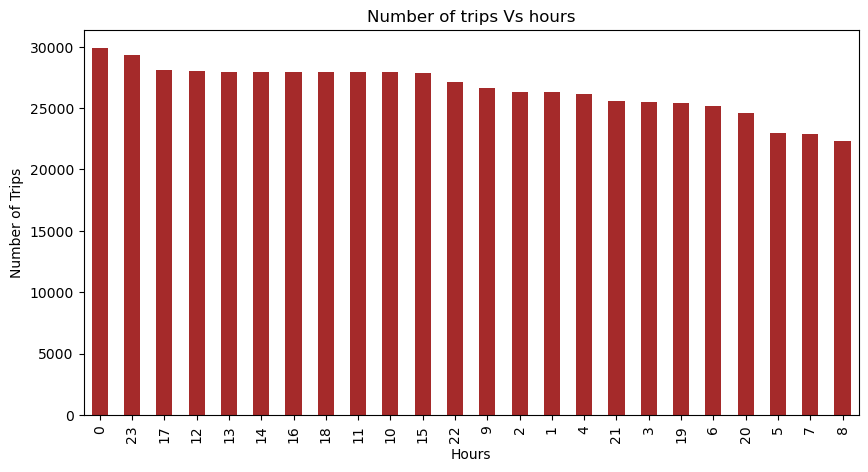

In [27]:
hours = data2['hour'].value_counts()
hours.plot(kind= 'bar', color= 'brown', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

As we can see, the result is very different from the travel patterns of a single person. Given Uber’s popularity, rides are almost equally frequent at all day hours (and night). However, more rides are ordered towards midnight or during business hours in the afternoon.

To analyze the day of the week data, we need to generate the names of days from the timestamps.

In [28]:
day_week = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(data2['datetime'], format= "%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

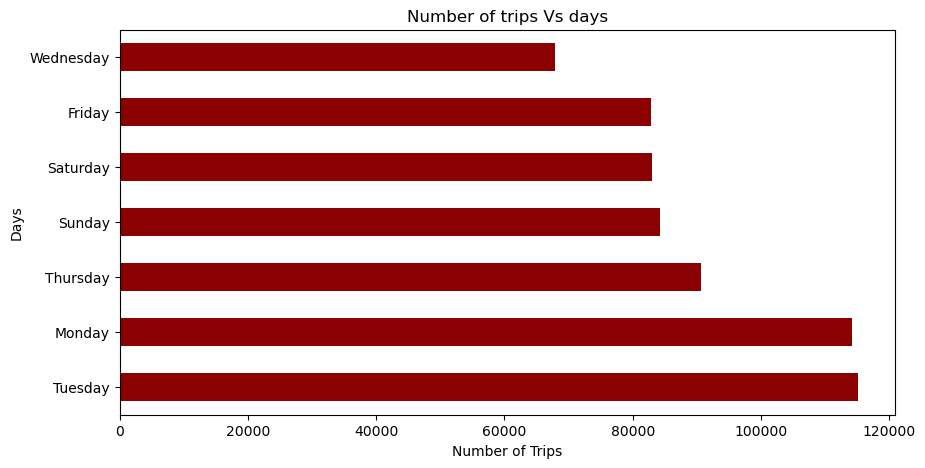

In [29]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'darkred', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Interestingly, more rides are ordered on the weekdays of Monday and Tuesday than on most. This might indicate active business meetings or late-night outings, as seen in the previous graph.

Further, as we noted in the introduction of the dataset earlier, the data only contains details of rides in Nov and December 2018. However, more rides were ordered in December similar to the personal Uber data analysis. 

Text(0.5, 1.0, 'Number of trips Vs Months')

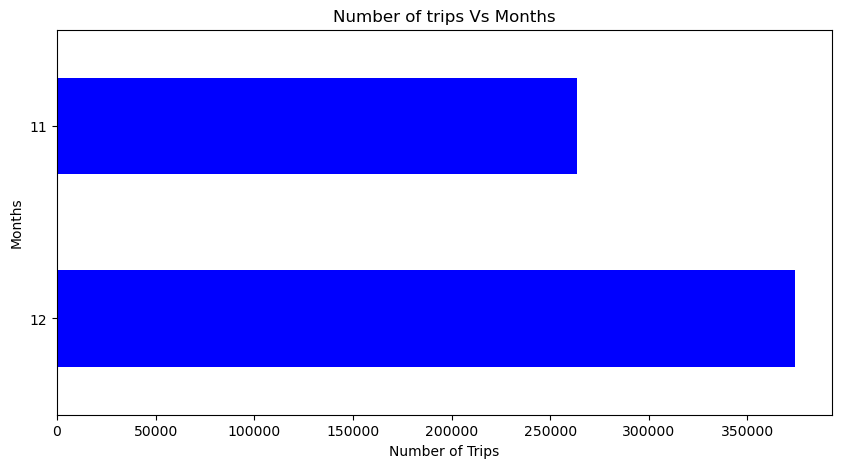

In [30]:
months = data2[ 'month' ].value_counts()
months.plot(kind='barh', color= 'blue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

However, in contrast to the former dataset, Uber rides were not more frequent during the holiday season in Boston.

Text(0.5, 1.0, 'Number of trips Vs days of december')

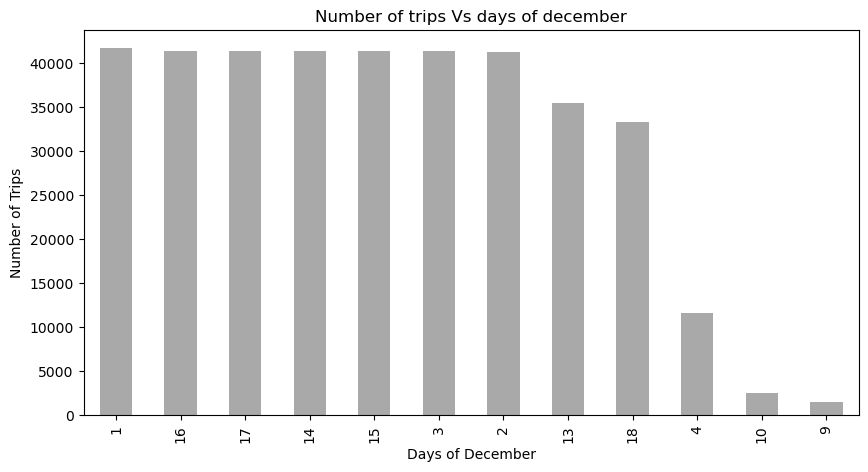

In [31]:
months = data2[ 'day' ][data2['month']==12].value_counts()
months.plot(kind='bar', color= 'darkgray', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Also, we note that there were no especially busy pickup or drop-off points in Boston, and most popular locations received a similar number of pick-up and drop-off requests. The Financial District (the business hub of Boston) received slightly more traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.

Text(0.5, 1.0, 'Number of Trips by Pickup points')

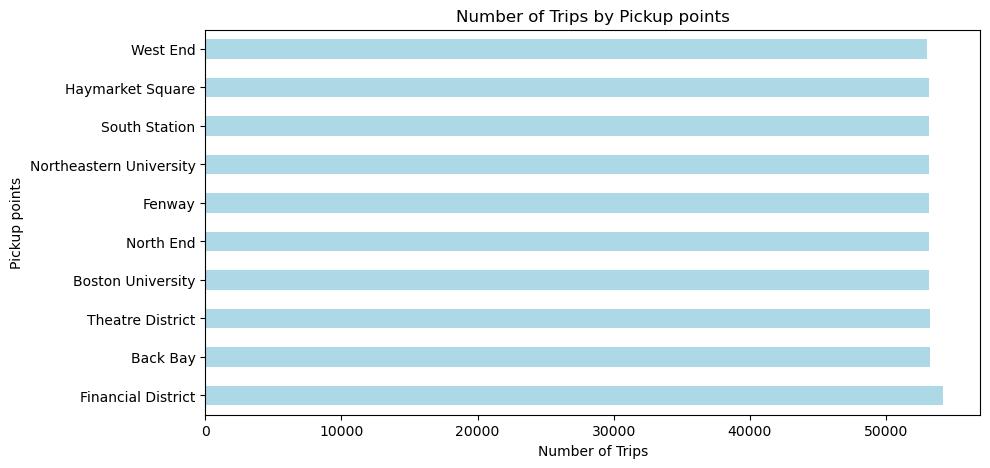

In [32]:
pic_point = data2[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

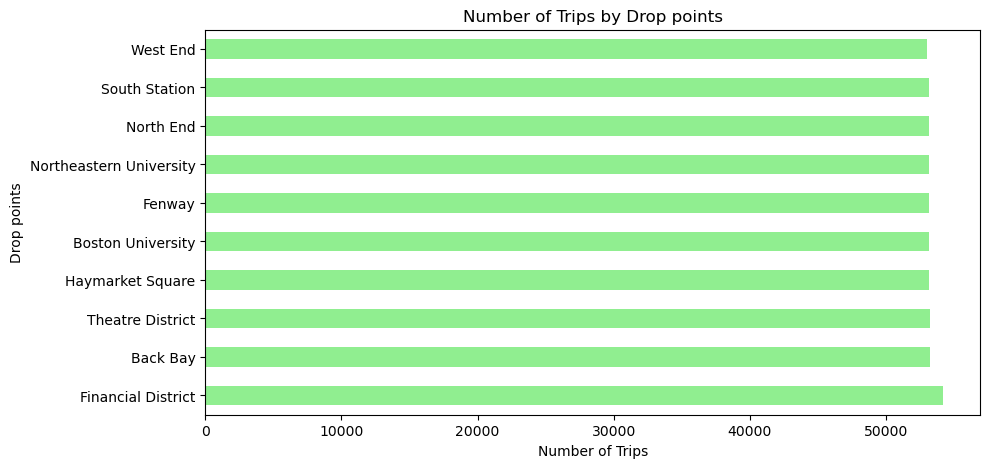

In [33]:
drop_point = data2[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

However, looking at the whole trip data, we find that most trips from and to the Financial District have the South Station on the other end. This means that people use Uber to reach the Metro more frequently than to reach their desired destination directly.

Text(0.5, 1.0, 'points - points Trips Counts')

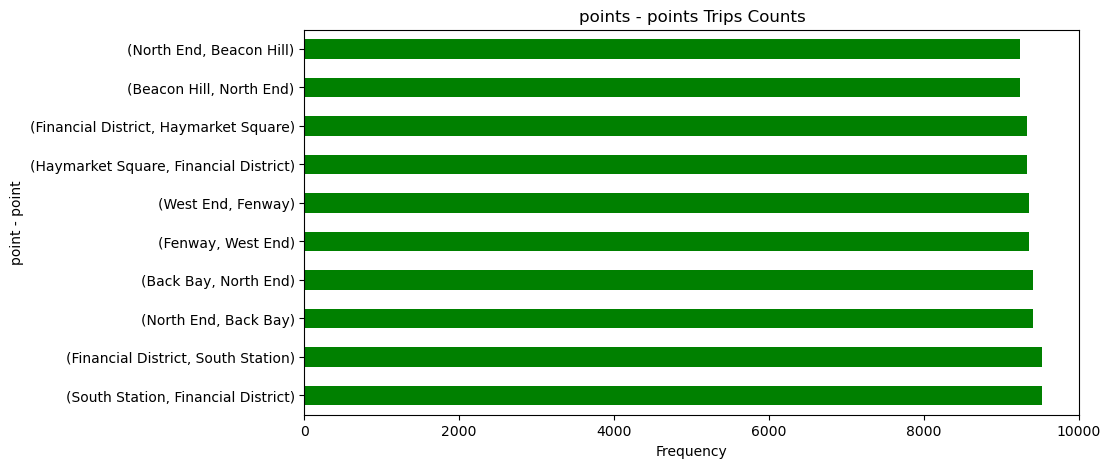

In [34]:
p_p = data2[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'green', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Finally, let’s see which types of Uber cabs do people prefer in Boston:

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

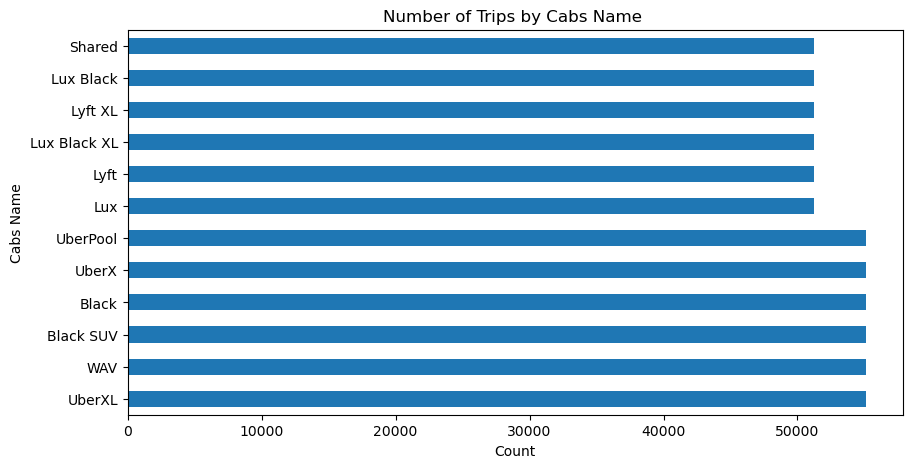

In [35]:
cabs = data2['name'].value_counts()
cabs.plot(kind='barh',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

Being the more affordable option, it is obvious why UberPool is more popular.

In [36]:
# Exporting tha data in csv format for visualization job...

# data2.to_csv('uber_data02.csv', index=False)

## Predictive Analysis for Uber Price Prediction using Machine Learning

Finally, let’s use machine learning models from scikit-learn to train on the Uber dataset and predict the price of the Uber trip given features such as time of day, cab type, destination, source, and surge charges. We will also include some weather data in the feature list.

The first step to using ML models is to bring all the categorical data to the numeric format using label encoding.

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:
data2['id'] = label_encoder.fit_transform(data2['id'])
data2['datetime'] = label_encoder.fit_transform(data2['datetime'])
data2['timezone'] = label_encoder.fit_transform(data2['timezone'])
data2['destination'] = label_encoder.fit_transform(data2['destination'])
data2['product_id'] = label_encoder.fit_transform(data2['product_id'])
data2['short_summary'] = label_encoder.fit_transform(data2['short_summary'])
data2['long_summary'] = label_encoder.fit_transform(data2['long_summary'])
data2['name'] = label_encoder.fit_transform(data2['name'])

Let’s also look at some of the labels assigned to certain features that might be significant to carry this project forward in the future.

Labels for the Cab Type Name

In [39]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


Labels for the Pickup Point

In [40]:
data2['source'] = label_encoder.fit_transform(data2['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


Labels for the Current Weather 

In [41]:
data2['icon'] = label_encoder.fit_transform(data2['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [42]:
data2['cab_type'] = label_encoder.fit_transform(data2['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


Since we are only predicting the prices for Uber, our dataset will contain around 385,000 samples.

In [43]:
len(data2[data2['cab_type']==1])

330568

## Create the Training Dataset
Using scikit-learn, we create a train/test split of the dataset with the price column as the target.

In [44]:
x = data2[data2['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data2[data2['cab_type']==1]['price']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

Moreover, let’s look at what the typical prices are for the rides. We see below that most rides cost between $5 and $20 each.

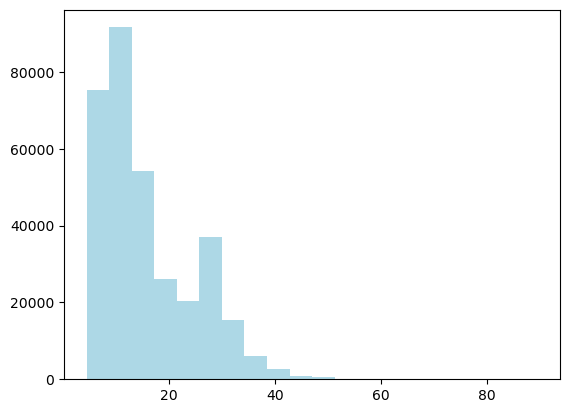

In [46]:
plt.hist(y, bins=20, color = 'lightblue')
plt.show()

## Import the sklearn Module
We will train and compare the performance of four ML models: linear regression, decision tree, random forest, and gradient boosting.

Moreover, since our dataset has 25 feature columns, a feature selection technique like RFE would be helpful for optimal analysis. We will experiment with training these four models on 5, 10, 15, 20, and all 25 features to find the optimal number based on performance.

In [47]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble

Let’s define a function that will fit and test all these models:

In [48]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))
    
    
    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test)) 
    
    
    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test)) 
    

    print("GBM... ")
    gbm_model = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm_model.fit(x_train,  y_train)
    print(gbm_model.score(x_test,  y_test)) 
    
    return [lr_model, dt_model, rf_model, gbm_model]

You can change the number of estimators and the maximum depth of all the decision tree-based models as per your use case.

Since we are working with 25 chosen features, it would be good to perform feature selection or elimination to see if we can reduce the number optimally even more. Recursive feature elimination is one such method implemented by scikit-learn in Python.  Recursive feature elimination or RFE reduces the data complexity by iteratively removing features and checking the model performance until the optimal number of features (having performance close to the original) is left.

So, we also define a function that runs RFE and extracts the most important features for each type of model trained. This function takes as input the trained_model (with which we will compare the performance of the reduced number of features), training and testing data, and the number of features we need in the final dataset after running the RFE.

In [49]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

First, we check the scores on models fitted using all 25 features:

In [50]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6524591041659586
Decision Tree... 
0.9485131391462979
Random Forest... 
0.9419807235622679
GBM... 
0.9519362918306618


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0),
 GradientBoostingRegressor(max_depth=5, n_estimators=200)]

GBM performs the best, while Linear Regression is poor at capturing the relations among features.

However, we find that the models perform marginally better with fewer features by running the code below.

In [ ]:
model_list = train_test_models(x_train, y_train, x_test, y_test)
n_features = [5, 10, 15, 20]

for model in model_list:
    for nf in n_features:
        print(f"{model}->{nf} features")
        feature_eliminate(model, x, y, nf)

Linear Regression... 
0.6524591041659586
Decision Tree... 
0.9485131391462979
Random Forest... 
0.9419807235622679
GBM... 
0.9519326659022911
LinearRegression()->5 features
0.6564219657294845
LinearRegression()->10 features
0.6564572682689505
LinearRegression()->15 features
0.6564359599010785
LinearRegression()->20 features
0.6564310313238764
DecisionTreeRegressor(max_depth=10, random_state=0)->5 features
0.9519683669372733
DecisionTreeRegressor(max_depth=10, random_state=0)->10 features
0.9505635280282637
DecisionTreeRegressor(max_depth=10, random_state=0)->15 features
0.9500860411924364
DecisionTreeRegressor(max_depth=10, random_state=0)->20 features
0.9498939749659479
RandomForestRegressor(n_estimators=20, random_state=0)->5 features


Linear regression, decision tree, random forest, and GBM perform better with 5 or 10 features instead of 25.

## Key Findings

Based on the analysis of the Uber datasets, here are some key findings:

#### 1. For the Uber Personal Data:

- The user primarily uses Uber for work-related purposes, followed by meals, errands, and customer visits.
- The distances traveled by the user are relatively short, indicating local or city travel.
- The user tends to travel during lunch hours and early evenings, possibly for client visits or lunches.
- There is regular travel throughout the week, with slightly higher trips on Fridays, which may indicate recreational activities.
- December 2016 had significantly more trips, likely due to the holiday season.
- The user frequently travels between Cary and Morrisville, suggesting a frequent commute within or between these locations.

#### 2. For the Boston Uber Data:

- Uber rides in Boston are relatively evenly distributed throughout the day, with slightly higher frequencies at midnight and during business hours in the afternoon.
- Weekday travel patterns show no significant variations, indicating consistent demand throughout the week.
- The dataset includes more than 55 columns, but only a subset of columns was considered for analysis.
- GBM demonstrated the highest performance, while Linear Regression showed poor ability to capture the relationships among features. Decision Tree, Random Forest, and GBM performed better when trained with a reduced number of features (5 or 10) compared to using all 25 features.
- The analysis suggests that a smaller set of features can lead to comparable or even improved model performance.

## Bussiness Suggestions

Based on these findings, here are some business suggestions:

1. Work-related Focus: Since the user in the personal dataset primarily uses Uber for work-related purposes, Uber can target similar users and offer business-oriented features or services. This could include tailored offers for corporate clients, preferred routes for business travel, or partnerships with companies for employee transportation.

2. Targeted Marketing: Uber can leverage the insights from both datasets to create targeted marketing campaigns. For example, during the holiday season, Uber can offer special promotions or discounts to encourage more usage. In Boston, Uber can focus on marketing campaigns that highlight the convenience and availability of rides throughout the day.

3. Improved Route Optimization: Given the frequent travel patterns between specific locations (Cary and Morrisville in the personal dataset), Uber can optimize route planning and dispatch algorithms to ensure efficient and reliable rides for users traveling between these locations. This could result in shorter wait times and better overall user experience.

4. Enhanced Recommendation System: By understanding user preferences and travel patterns, Uber can enhance its recommendation system to suggest popular destinations, nearby attractions, or personalized offers based on user history. This can improve user engagement and increase overall satisfaction.

5. Data-Driven Decision Making: Uber can continue to invest in data analysis and exploration to gain deeper insights into user behavior, preferences, and market trends. This can inform strategic decision-making, product development, and service improvements.

6. Encourage regular communication and knowledge sharing between data scientists and operational teams to leverage the insights from machine learning models effectively and align them with business objectives.

7. Business suggestion: Consider focusing on a subset of key features rather than using the entire feature set when training models. This can lead to more efficient and accurate predictions, reducing computational resources and simplifying model interpretation.

Overall, leveraging data analysis and insights can help Uber optimize operations, enhance the user experience, and drive business growth.

## Uber Data Analysis - Challenges Working with Uber data


Working with different kinds of data poses a unique challenge each time. Issues might crop up in the data values stemming from the data collection stage or the data storing/retrieval stage. One such challenge for the Uber dataset is that many location columns have NULL values or say “Unknown Location.” When fewer in number, you can delete these rows. But in our case, “Unknown Location” has a high occurrence in the location columns but does not give us any knowledge or insight about the user’s travel patterns. But due to their significance, those rows cannot be ignored unless the rest of the features of those rows are proven to be equally useless.



## Learning Takeaways from Uber Data Analysis Project using Machine Learning

We looked at two different types of Uber ride datasets – a personal ride history for a single person and a two-month record of all the Uber rides in Boston, MA. We compared similar graphs in the EDA process of both these datasets to generate real-world insights into the behavior of the Uber riders and trips in the city of Boston. Furthermore, we used different ML models to perform a price prediction of the Uber ride based on a fixed number of features from the second dataset. We also perform feature selection to reduce the number of features and find the optimal amount to improve model performance to a certain degree. We find that Gradient Boosting Machine (GBM) works best in this dataset, yielding 0.95.

Finally, we noted some crucial issues faced by scientists during EDA and data analysis and listed the challenges of working with the Uber datasets.

## Which algorithm does Uber use for Data Analysis?

Every ride booked on Uber gives their team a large amount of information, including the riders booking preferences, pickup, and drop-off trends, availability of drivers in the area, traffic patterns, ride ETA, duration, speed, weather factors, and more. Uber uses this data to train a multitude of machine learning algorithms like the ones discussed in this blog for various purposes. Some popular uses include calculating a competitive fare to maximize profits (using predictive modelling algorithms), estimating surge prices (using a model called “Geosurge”), tuning the requirements of drivers in a particular region, catching fake rides, and fake drivers, and estimating ride info like ETA.

## Conclusion

The Uber Data Analysis and Prediction Project demonstrates the power of data analytics in understanding user behavior, optimizing operations, and making informed business decisions. Through careful analysis and modeling, valuable insights can be derived to enhance the overall performance and competitiveness of Uber. The project emphasizes the importance of data-driven decision-making and the utilization of advanced tools and techniques for data analysis and prediction.

For more detailed information, refer to the notebooks, visualizations, and reports provided in this repository.


## Contact Information

For any questions or inquiries, please contact:

##### Muhammad Habib

[muhummad.habib7@gmail.com](muhummad.habib7@gmail.com)

LinkedIn: [linkedin.com/in/Mh-habib7](https://www.linkedin.com/in/mh-habib7/)

Github:  [github.com/Mh-Habib7](https://github.com/Mh-Habib7)